# Assignment: Data Centre Management

### Problem Statement

We are managing two data centres. We aim to buy, sell, and transfer servers, in order to meet customer demand of different types, and maximise profits.

One data centre is low-latency, the other high-latency. There are two types of server, CPU and GPU. Thus, there are four types of demand (low versus high latency) x (CPU versus GPU). Of course, high-latency demand can be satisfied by the low-latency data centre, but not vice versa.

Demand is in integers, and changes every time-step. Every unit of demand that we satisfy gives us some amount of profit. This amount is different for the four types of demand. A unit of demand that is not satisfied gives us zero profit, of course.

Demand is dynamic, ie changes every time-step, but it is known in advance. Between time-steps we can purchase servers, sell servers, and even transfer servers from one data centre to the other. We assume this is instantaneous. Each server type has a different purchase cost (which costs us money), selling price (which gives money to us), and transfer cost (which costs us money). If data centre 0 chooses to transfer a server to data centre 1, then data centre 1 receives it - it does not need to choose to receive it.

At the start, we have some number of each server type in each data centre. After the final time-step, we will buy and/or sell servers in order to return to the same number of each that we had at the start. The objective function will implement this automatically, ie the proposed solution doesn't need to do this. As a result, eg for $n=100$ the sequence will look like this:

    [initial servers give profit for day 0]
    (commands 0 give income and expense)
    [servers give profit for day 1]
    (commands 1 give income and expense)
    ...
    (commands 99 give income and expense)
    [servers give profit for day 100]
    (automatically generated commands 100 give income and expense)
    [final servers, day 101, no contribution to profit]

And so for $n=100$ we require 100 sets of commands (commands 0-99 inclusive), and the history of how many servers we have will contain 102 items when including the initial day 0 and final day 101.

Our goal is to maximise the total profits.

At each time-step, we have four numerical variables representing the number of servers of each type, and four variables giving the demand at that time-step.

Our task is to solve this problem, comparing multiple algorithms / algorithmic ideas, and variants, and multiple hyperparameter values where appropriate, and report briefly on the results.

### Data

The data is given in two files, `demand.npy` and `data.txt`.

Notice the values in `data.txt`. These values create a consistent economic model where:

* Low-latency servers are more valuable than high-latency;
* GPU servers are more valuable, more expensive to buy or sell, and more expensive to transfer, than CPU;
* There's a cost associated with moving servers.


### Representation

In the supplied code, a solution is a sequence of buy/sell/transfer commands, for each time-step, for each data centre, for each server type. A data centre can execute multiple commands in the same time-step. For a single time-step we need to represent (2 x 2 x 3) commands. Eg consider these commands for a single time-step:

    1, 2, 3,    4, 5, 6,      7, 8, 9,    10, 11, 12

This means: at this time-step, data centre 0 will:

    Buy 1 CPUs
    Sell 2 CPUs
    Transfer 3 CPUs to dc 1
    Buy 4 GPUs
    Sell 5 GPUs
    Transfer 6 GPUs to dc 1

Data centre 1 will:

    Buy 7 CPUs
    Sell 8 CPUs
    Transfer 9 CPUs to dc 0
    Buy 10 GPUs
    Sell 11 GPUs
    Transfer 12 GPUs to dc 0

We will have n of these rows, 1 per time-step. So, one possible solution representation for a complete solution is an array of (n x 2 x 2 x 3) integers. This is the representation used by the objective function code below.


### Experiments

You are free to use any metaheuristic algorithms, including HC, SA, GA, and/or any variant. You can implement your own, use code from class, or import libraries. You are free to use any encoding, which could be a bitstring encoding, integer encoding, or something else; a genotype-phenotype mapping, a repair mechanism, or similar; and/or custom `init`, `nbr`, and/or `crossover` operators. You are free to use a different objective function **during the run**, but remember that you must use my objective function for the **final evaluation**, for fair comparison of all methods. You are free to use ideas which you or others have suggested in class to improve the algorithms.

For each setup, you should run the setup 5 times with random seeds 0, 1, 2, 3, 4, and compare the mean performance.

If you wish, you can show curves to demonstrate behaviour, such as objective versus iterations, or diversity versus iterations, or specific characteristics of solutions, like total transport costs versus iterations. Some plotting code is supplied below.

### Due date

As announced on Canvas.

### Grading

This assignment is worth 30% of the module.

* 40-50%: any optimisation algorithm capable of running on this problem and producing a solution, and good understanding of the code and results;
* 50-60%: all of the above, with at least two algorithms and an experiment comparing them;
* 60-70%: all of the above, with a comprehensive experiment on 3+ algorithms, including hyperparameters where suitable, and full understanding of the results;
* 70-85%: all of the above, with 1 or more small algorithmic ideas beyond our basic SA and GA, eg appropriate choice of encoding, well-designed operators and full understanding of algorithms and results;
* 85-100%: all of the above with 1 or more substantial problem-specific algorithmic ideas, such as constructive heuristics, repair operators, genotype-phenotype mappings; brief exploration beyond the problem, eg multi-objective formulations; and well-performing algorithms.

Your report should be written in an `ipynb` file including all your code, results, any necessary graphics and tables, and description. You should include a clear and short statement of (a) the standard algorithms you are using; (b) your novel algorithmic ideas; and (c) the results. As a guideline, I recommend 1000 words of text, and I think it will be possible to provide solutions and experiments in 100-200 lines of code (in addition to the code provided). These are not hard limits.

### Teams

You may work solo, or in a team of 2. If in a team of 2, both students must submit and their submissions must be identical. You may not work together with a student you previously worked with in any other assignment in any other module. To work in a team, one team member must send email to the lecturer at least 2 weeks before the deadline including both members' names and ID numbers, cc-ing the other team member. If you work in a team, both members have to work together on all aspects of the problem: you cannot divide it up between you.

### Reusing code and plagiarism

You may import libraries if they can be directly installed using Anaconda or pip.

You may not use substantial amounts of code from the internet, but short snippets are allowed, with citation, ie a URL in a comment to show exactly what code was sourced from where. It is not sufficient to include a list of sources at the bottom of your notebook, as that does not show exactly what code was sourced from where.

You may discuss work with others, but you may not look at work by others or show your work to others.

You may not use AI-generated code.

### Interviews and work-in-progress

After submission, we will hold very short interviews. Where a student or team cannot answer questions about their own work at interview, they will lose substantial marks.

You should show me your work in progress during labs, and tell me in particular what standard and non-standard algorithmic ideas you plan to use, and tell me if you are working in a team. Where a student shows good understanding of their own work in progress during labs they may not need to come to interview.

#### Name: Vaibhav Tamta
#### StudentId: 24235142

### Imports, util functions, and problem data

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def load_data(filename):
    return eval(open(filename).read())

In [5]:
def plot_demand(demand):
    # plot the demand of each type at each time-step

    fig, ax = plt.subplots(2, 2, figsize=(8, 6))
    for data_centre in range(2):
        for server_type in range(2):
            ax[data_centre, server_type].plot(range(1, n+1), demand[:, data_centre, server_type], label=("demand"))
            ax[data_centre, server_type].set_xlabel("Time-steps")
            ax[data_centre, server_type].set_title(f"Demand: Data centre {data_centre}; Server type {server_type}")
    ax[data_centre, server_type].legend()
    plt.tight_layout()

def plot_history(demand, server_history, solution):
    # plot the demand of each type, the "stock" or number of servers of each type,
    # and the solution's commands, at each time-step
    fig, ax = plt.subplots(2, 2, figsize=(8, 6))
    for data_centre in range(2):
        for server_type in range(2):
            # the demand has values from 0 to n-1
            ax[data_centre, server_type].plot(range(n), demand[:, data_centre, server_type], label=("demand"))
            # the server history has values from 0 to n+1
            ax[data_centre, server_type].plot(range(n+2), server_history[:, data_centre, server_type], label="stock")
            for i, command in enumerate(['buy', 'sell', 'transfer']):
                # the solution contains commands from 0 to n-1 (doesn't include final time-step)
                ax[data_centre, server_type].plot(range(1, n+1), solution[:, data_centre, server_type, i], label=command)
            ax[data_centre, server_type].set_xlabel("Time-steps")
            ax[data_centre, server_type].set_title(f"History: Data centre {data_centre}; Server type {server_type}")
    ax[data_centre, server_type].legend()
    plt.tight_layout()

def plot_optimisation(history):
    # plot the value of profit at each step of our optimisation
    # NB, don't confuse the time-steps of the data centre simulation
    # with the steps of the optimisation!
    plt.plot(history[:, 0], history[:, 1])
    plt.xlabel("Iterations")
    plt.ylabel("Profit")
    plt.tight_layout()

In [6]:
n, initial_servers, constants = load_data("data.txt")
demand = np.load("demand.npy")

In [7]:
n

100

In [8]:
initial_servers

array([[10,  5],
       [ 8,  4]])

In [9]:
constants

{'purchase_cost': array([100, 200]),
 'selling_price': array([ 80, 160]),
 'transfer_cost': array([10, 20]),
 'profit_per_demand': array([[5, 8],
        [3, 6]])}

In [10]:
demand.shape

(100, 2, 2)

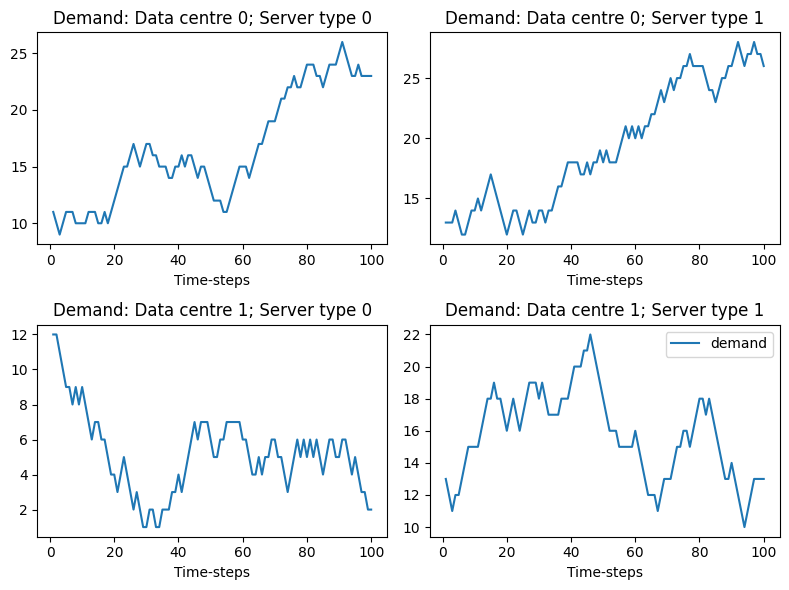

In [11]:
plot_demand(demand)

### Objective function

In [12]:
def calculate_total_profit(solution, initial_servers, demand, constants, return_history=False):
    """
    Calculate the total profit for a given solution in the data center server optimization problem.

    Parameters:
    solution (np.array): Array of shape (n, 2, 2, 3) representing the buy/sell/transfer decisions
    initial_servers (np.array): Array of shape (2, 2) representing initial server counts for each data center and type
    demand (np.array): Array of shape (n, 2, 2) representing daily demand for each data center and server type
    constants (dict): Dictionary containing constant values for the problem
    return_history (bool): whether to return a history showing behaviour during the time-steps

    Returns:
    tuple: (total_profit, server_history)
        total_profit (float): Total profit
        server_history (np.array): Array of shape (n+1, 2, 2) representing server counts at each time step

    NB: I used Claude.AI to help generate parts of this code.
    """
    # Solution should have 1 row for each time-step, else it is invalid
    if solution.shape[0] != n: return -100000

    # Unpack constants
    purchase_cost = constants['purchase_cost']
    selling_price = constants['selling_price']
    transfer_cost = constants['transfer_cost']
    profit_per_demand = constants['profit_per_demand']

    total_profit = 0
    current_servers = initial_servers.copy()
    server_history = np.zeros((n+2, 2, 2)) # NB n+2 due to special initial and final days
    server_history[0] = current_servers

    for day in range(n+1):

        # Calculate profit from satisfying demand for today
        for dc in range(2):
            for server_type in range(2):

                if day != n:
                    satisfied_demand = min(current_servers[dc, server_type], demand[day, dc, server_type])
                    total_profit += satisfied_demand * profit_per_demand[dc, server_type]

                    # High-latency demand can be satisfied by low-latency data center
                    if dc == 0:  # Low-latency data center
                        remaining_capacity = current_servers[dc, server_type] - satisfied_demand
                        extra_satisfied_demand = min(remaining_capacity, demand[day, 1, server_type])
                        total_profit += extra_satisfied_demand * profit_per_demand[1, server_type]

        # Apply buy/sell/transfer decisions
        for dc in range(2):  # For each data center
            for server_type in range(2):  # For CPU and GPU

                if day == n:
                    # on the last day, special transaction, not specified
                    # in the solution, bring us back to initial server values
                    diff = current_servers[dc, server_type] - initial_servers[dc, server_type]
                    if diff > 0:
                        cmds = (0, diff, 0)
                    else:
                        cmds = (-diff, 0, 0)
                else:
                    cmds = solution[day, dc, server_type]

                # Buy
                current_servers[dc, server_type] += cmds[0]
                total_profit -= cmds[0] * purchase_cost[server_type]

                # Sell (avoid over-selling, ie selling servers we don't have)
                sell_amount = min(cmds[1], current_servers[dc, server_type])
                current_servers[dc, server_type] -= sell_amount
                total_profit += sell_amount * selling_price[server_type]

                # Transfer (avoid over-transferring)
                transfer = min(cmds[2], current_servers[dc, server_type])
                current_servers[dc, server_type] -= transfer
                current_servers[1-dc, server_type] += transfer
                total_profit -= transfer * transfer_cost[server_type]

        # Record server counts for following day
        server_history[day+1] = current_servers

    if return_history:
        return total_profit, server_history
    else:
        return total_profit


In [13]:
def f(x, return_history=False):
    # a "shim" function because our algorithms expect f() to have a single argument, x
    return calculate_total_profit(x, initial_servers, demand, constants,
                                  return_history=return_history)

### Example usage: a random solution

Total profit: -8094


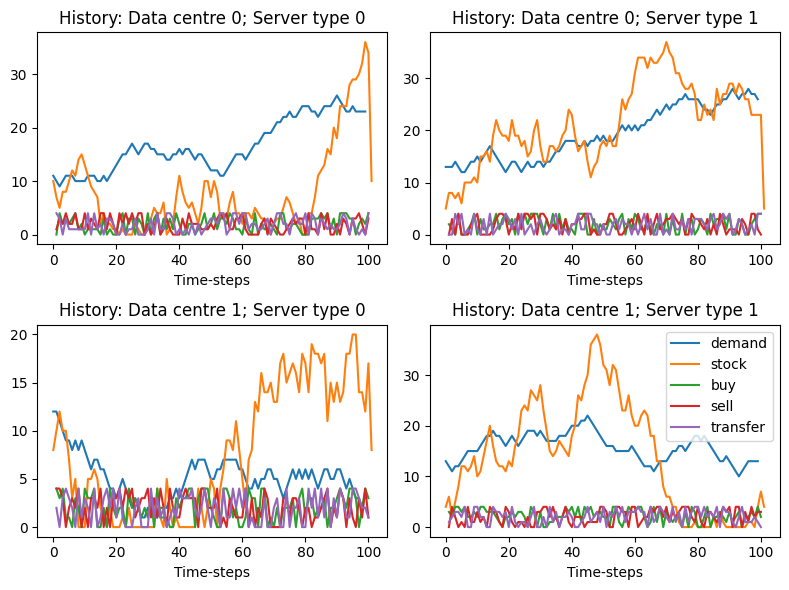

In [14]:
# Generate a random solution for demonstration
# Every buy/sell/transfer command is a random integer, 0-4 inclusive
solution = np.random.randint(0, 5, size=(n, 2, 2, 3))
total_profit, server_history = f(solution, return_history=True)
print(f"Total profit: {total_profit}")
plot_history(demand, server_history, solution)

### Example usage: a "do-nothing" solution

Total profit: 12904.0


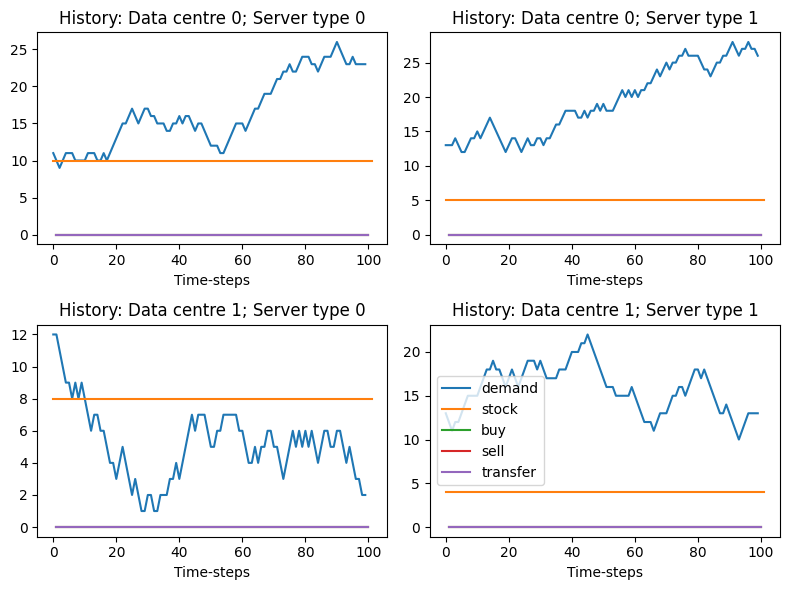

In [15]:
# Now try a "do-nothing" solution for comparison, ie all buy/sell/transfer commands are zero
solution = np.zeros((n, 2, 2, 3))
total_profit, server_history = f(solution, return_history=True)
print(f"Total profit: {total_profit}")
plot_history(demand, server_history, solution)

# Hill Climbing (Normal Hill Climber)

In the given approach we initialize the values (0,6). The shape of the array in which the values are initialized are of the size of n x 2 x 2 x 3.
where is for the number of days, 2 is for the number centers, 2 is for type of servers (CPU, GPU) and 3 tells about command which is buy, sell, and transfer

The neighbour function below takes only one change at a time for a particular index (which is either +1 or -1). The index values are taken randomly using random.randint, this way any random value from the given initialized array is selected and the value for that index is either increased or decreased by 1 (1 step stating it as the neighbour)

Below we can see we implement the basic Hill climber where it takes 1 step towards its neighbour and checks for the objective function performance. If it provides better profit, then both the profit and solution are saved and returned as the final output.

Total profit:  [10000 24341]


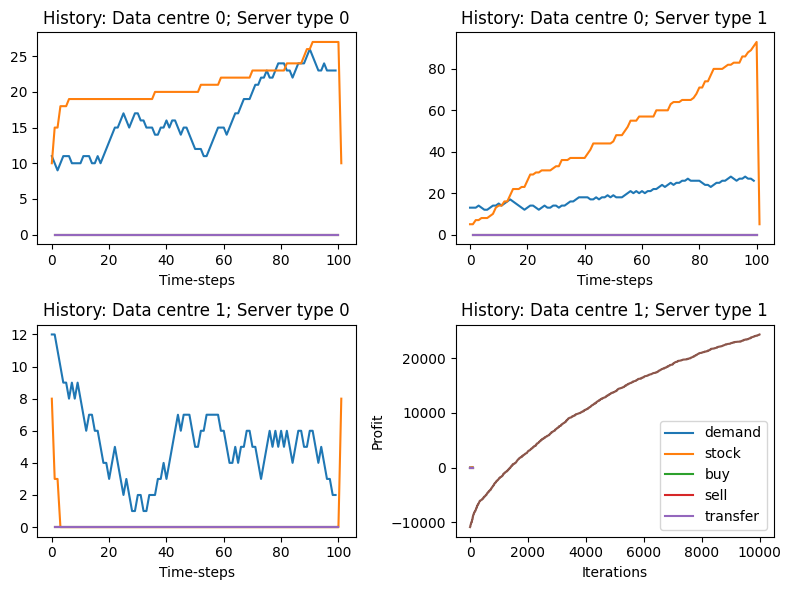

In [57]:
#intialization function
def initializer(val = 6):
    return np.random.randint(0, val, size = (n, 2,2,3))

# neighbouring function
def neighbour(x):
    x = x.copy()
    day = np.random.randint(0, 100)
    center = np.random.randint(0,2)
    server = np.random.randint(0,2)
    cmd = np.random.randint(0,3)
    if x[day, center, server, cmd] == 0:
        x[day, center, server, cmd] += 1
    x[day, center, server, cmd] += np.random.choice([-1, 1])
    return x


# Creating HC metaheuristics
def HC(f, init, nbr, its):
    #initialization
    history = []
    x = init()
    fx = f(x)
    for i in range(its):
        x = x.copy()
        x_new = nbr(x)
        if f(x_new) > fx:
            x = x_new
            fx = f(x_new)
        history.append([i+1, fx])
    return x, np.array(history)


best, hist = HC(f, initializer, neighbour, its = 10000)
print(f"Total profit: ", hist[-1])
plot_history(demand, server_history, solution)
plot_optimisation(hist)

# Hill Climbing (Best Ascent)


Hill Climbing (HC) is a simple local search algorithm used for optimization problems. It is an iterative algorithm and makes incremental changes to the solution to improve it.

Steps of the Hill Climbing (Best Ascent) Algorithm

1. Initial Solution: The algorithm starts with an initial solution, which can be random chosen.
2. Neighbors: The algorithm evaluates a set of neighbouring solutions, which are small variations of the current solution.
the solutions are generated by modifying the current solution slightly by delta of +- 1.
3. Selection of the Best Neighbor: The algorithm evauates each neighbor and selects the ones with the best objective value. The function f() calculates the profit for each solution, and the neighbor with the best value is selected.
4. Termination: The process contines iteratively, evaluating the neighbors and selecting the best one at each step. The Algorithm terminates after the number of iterations are made or no further improvements can be seen.
Here we are using max_iterations as 416 because 10,000 / 24 is 416. In the Loop we are iterating all the 24 neighbours. To keep the number of iterations common between all the algorithms for easy comparison



### What is Best Ascent?
In the "best ascent" version of Hill Climbing, only the best possible neighbor is chosen, and if it improves the current solution, the algorithm continues from that neighbor. If no improvement is found, the algorithm halts.
Instead of picking the first neighbor that improves the solution, the algorithm evaluates all neighbors and chooses the one that provides the best improvement
It only moves to the best possible neighbor, even if that means evaluating all options.

### Why is Best Ascent Hill Climbing better than Normal Hill Climbing algorithm

* It ensures that each move improves the solution as much as possible, increasing the chances of reaching a better local maximum.
* The algorithm is also less likely to settle on a low score or a low profit soltion because it always choose the best available move as=t each step



Since Initially we were getting very low values for our Hill Climbing as it was stuck in a local optima, we though of modifying the Hill Climbing algorithm, and we thought of modifying the neighbouring function to form a Best Ascent Hill Climbing.
The Advantage is that Best Ascent Hill Climbing always chooses the best solution while Normal Hill Climbing might settle in a local optima

Total Profit: 33495


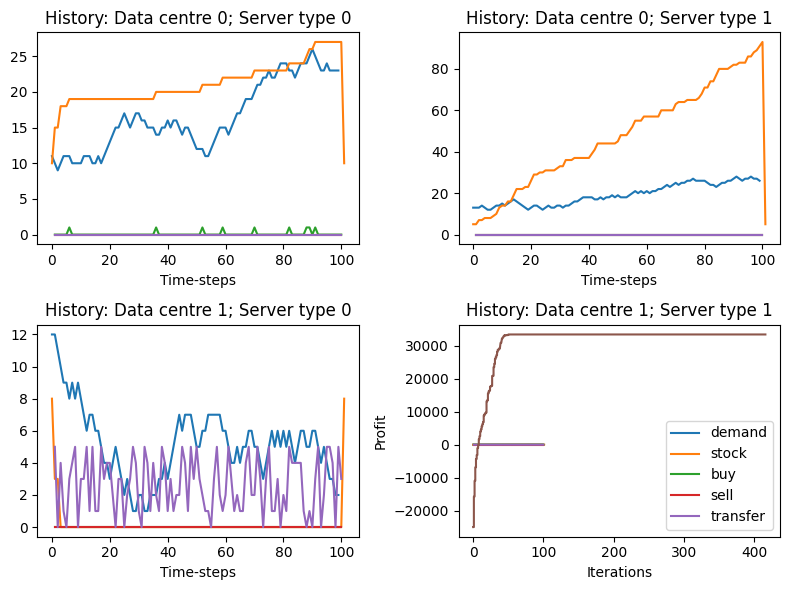

In [51]:
def init(n):
    return np.random.randint(0, 6, size=(n, 2, 2, 3))

def nbr(solution):
    neighbors = []
    for dc in range(2):
        for server_type in range(2):
            for cmd in range(3):
                for delta in [-1, 1]:
                    neighbor = solution.copy()
                    neighbor[:, dc, server_type, cmd] += delta
                    neighbor[neighbor < 0] = 0
                    neighbors.append(neighbor)
    return neighbors

def hill_climbing(initial_solution, n, max_iterations=416):#To keep the max iterations at 10,000 for easy comparison(10,000/24) where 24 are the neighbors in the loop
    current_solution = initial_solution
    current_profit, _ = f(current_solution, return_history=True)
    best_solution = current_solution
    best_profit = current_profit

    history = []
    history.append([0, current_profit])

    for Iterations in range(max_iterations):
        neighbors = nbr(current_solution)
        improved = False

        for neighbor in neighbors:
            neighbor_profit, _ = f(neighbor, return_history=True)
            if neighbor_profit > best_profit:
                best_solution = neighbor
                best_profit = neighbor_profit
            current_solution = best_solution
            history.append([Iterations+1, best_profit])



    return best_solution, best_profit, np.array(history)

initial_solution = init(n)

best_solution, best_profit, history = hill_climbing(initial_solution, n)
print(f"Total Profit: {best_profit}")


_, server_history = f(best_solution, return_history=True)

# Plot demand and server history
plot_history(demand, server_history, best_solution)

# Plot solution commands
plot_optimisation(history)

# Simulated Annealing

Simulated Annealing (SA) is a probabilistic optimization algorithm useful for finding an approximate global optimum in problems with large and complex solutions spaces, where traditional optimization methods may get stuck in local optima

Steps of the Simulated Annealing Algorithm:
1. Initialization: Start with a random solution (x) and calculate its objective value (f(x)).
2. Neighbor Generation: The neighbour(x) function randomly modifies a solution by altering values at specific indices.
3. Acceptance criteria: the new solution (xnew) improves the objective value (f(xnew) > fx), it is accepted as the current solution.
If the new solution is bad or worse than the previous one, it may still be accepted with a certain probability, which decreases as the temperature (T) decrease. and the formula is exp((fxnew - fx) / T)
4. Cooling: After each iteration, T is reduced by multiplying it by a cooling rate alpha
5. Termination: The algorithm terminates after it performs the number of iterations that has been mentioned and finding the best solution and then returned



Total profit:  [ 9999 32347]


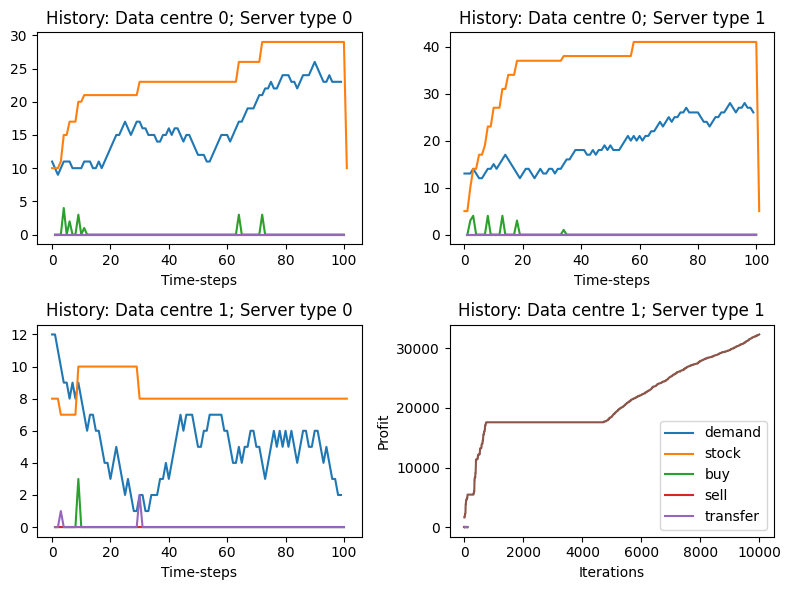

In [68]:
#intialization function
def initializer(val = 3):
    return np.random.randint(0, val, size = (n, 2,2,3))

# neighbouring function
def neighbour(x):
    x = x.copy()
    day = np.random.randint(0, 100)
    center = np.random.randint(0,2)
    server = np.random.randint(0,2)
    cmd = np.random.randint(0,3)
    if x[day, center, server, cmd] == 0:
        x[day, center, server, cmd] += 1
    x[day, center, server, cmd] += np.random.choice([-1, 1])
    return x

def SA2(f, init, nbr, its, T = 1000.0, alpha = 0.999):
    # assume we are maximising
    history_SA = []
    x = init() # initial random solution
    fx = f(x)
    bestx = x
    bestf = fx
    T = 1000.0 # initial temperature
    alpha = 0.999 # temperature decay per iteration
    for i in range(its):
        xnew = nbr(x) # generate a neighbour of x
        fxnew = f(xnew)
        if (fxnew > fx or
            np.random.random() < np.exp((fxnew - fx) / T)):
            x = xnew
            fx = fxnew
        if fx > bestf:
            bestf = fx
            bestx = x
        history_SA.append([i, bestf])
        T *= alpha
    return bestx,np.array(history_SA)

best_SA, history_SA = SA2(f, initializer, neighbour, its = 10000, T = 1000.0, alpha = 0.999)
print(f"Total profit: ", history_SA[-1])
plot_history(demand, server_history, solution)
plot_optimisation(history_SA)

In [70]:
np.save("bestSA.npy", best_SA)

## Hyperparameter Tuning For Simulated Annealing SA
### Hyperparameter tuning is the process of finding the best values for the parameters that control the behavior of an optimization algorithm

*   T(initial Temperature) : Determines the starting point for exploration. Higher values allows the algorithm to accept worse solutions initially, which helps escape the local optima
*   alpha(cooling Rate) : Controls how quickly the temperature decrease over iterations. A slower cooling rate give the algorithm more time to explore the solution space.
*   its(Iterations) : It is the total number of steps of the algorithm. In our case we have kept this as a constant at 10,000 iterations, to compare with other algorithms



In [40]:
# Example ranges for hyperparameters
T_values = [500, 1000, 2000]
alpha_values = [0.995, 0.999, 0.9999]
its = 10000

best_params = None
best_fx = float('-inf')

for T in T_values:
    for alpha in alpha_values:
        _, history = SA2(f, initializer, neighbour, its=its, T=T, alpha=alpha)
        final_fx = history[-1][1]
        if final_fx > best_fx:
            best_fx = final_fx
            best_params = {'T': T, 'alpha': alpha, 'its': its}

print("Best Hyperparameters:", best_params)
print("Best Objective Value:", best_fx)


Best Hyperparameters: {'T': 500, 'alpha': 0.9999, 'its': 10000}
Best Objective Value: 32265


# Genetic Algorithm


##### Pop Initialzer
In the below approach for Genetic Algorithm we are setting the shape of population as pop_size x n x 2 x 2 x 3. we have seen above why the individual point is of n x 2 x 2 x 3. With pop_size we get a whole set of population which are candidates to provide us with the best solution.

##### Tournament Selection
The tournament selection function helps us to find the candidates which are giving the best profits in a given batch. By default we have taken the tournament size as 10 but in during hyperparameter tuning we some other values. This function randomly selects the 10 candidates from the given population and returns only the candidate which provided maximum profit. During random chosing of the candidates, replace = False because we don't want to repeat any candidate again, allowing each candidates of the population set equal chance of getting selected.

##### Crossover
In the crossover we pass on the two parents which are selected by the process of the tournament selection and we perform two point cross-over to provide child1 and child2. by default we have kept the crossover_rate as 0.8, meaning if during random decimal value generation if it is more than 0.8 then only cross-over would happen or else parent1, parent2 would be returned back. points p1 and p2 (which are the index values once we have flatten both the parents) are chosen at random and accordingly with the help of index sclicing we perform two ponit cross over.

#####  Mutation
During the mutation we try to randomly chose few of the indexes and replace those values with 1. During hyperparameter tuning we are experimenting between the values of 1 and 2. We came up with this approach because, initially when we had implemented our neighbour function defined above for HC, it just changed one element at a time, hence leading to slow improvements while runing GA Algorithm. So we decided to update multiple indices rather than single index being improved. With the help of multiple indices getting updated, we got to see fast and better improvements.

##### GA
In the Genetic Algorithm we are stiching up all the algorithms explained above together. We iterate it again and again using while loop to always get the new population made out of the best candidates. During creating the new population with best candidates, we always try to save the top 10 best performers from the previous batch, so we don't loose our best solution, this is taken care by elitism. This way we actually converge towards reaching the global optimum value which is our best profit.

In [63]:
# Writting GA from scratch from begining

#initialize
def pop_initializer(pop_size, n, val):
    return np.random.randint(0, val, size = (pop_size, n, 2,2,3))

#tournament selection
def tournament_selection(population, fitness_scores, tournament_size = 10):
    candidates = np.random.choice(len(population), tournament_size, replace = False)
    best_index = candidates[np.argmax([fitness_scores[i] for i in candidates])]
    return population[best_index]

# crossover
def crossover(parent1, parent2, crossover_rate = 0.8):
    if np.random.rand() > crossover_rate:
        return parent1.copy(), parent2.copy()

    p1_flat = parent1.flatten()
    p2_flat = parent2.flatten()
    p1, p2 = np.sort(np.random.choice(np.arange(len(p1_flat)), 2, replace = False))

    child1_flat = p1_flat.copy()
    child2_flat = p2_flat.copy()
    child1_flat[p1:p2] = p2_flat[p1:p2]
    child2_flat[p1:p2] = p1_flat[p1:p2]

    child1 = child1_flat.reshape(parent1.shape)
    child2 = child2_flat.reshape(parent2.shape)

    return child1, child2

#mutation
def mutation(indiv,mut_val, mutation_rate = 0.05):
    indiv_flat = indiv.flatten()
    mutation_mask = np.random.rand(indiv.size) < mutation_rate
    indiv_flat[mutation_mask] = np.random.randint(0,mut_val, size = np.sum(mutation_mask))
    return indiv_flat.reshape(indiv.shape)


# Genetic Algorithm
def GA(f, init, pop_size, val, ngens, mutation, crossover, selection, tournament_size, cross_rate, mut_rate,  mut_val, n, elite_fract):
    best_solution = None
    best_fitness = -np.inf
    history = []
    population = init(pop_size, n, val = 5)

    for gen in range(ngens):
        fitness_scores = np.array([f(i) for i in population])

        if fitness_scores.max()> best_fitness:
            best_fitness = fitness_scores.max()
            best_solution = population[fitness_scores.argmax()]

        elite_count = int(elite_fract*pop_size)
        elite_indices = np.argsort(fitness_scores)[-elite_count:]
        new_population = [population[i] for i in elite_indices]

        while len(new_population) < pop_size:
            parent1 = selection(population, fitness_scores, tournament_size)
            parent2 = selection(population, fitness_scores, tournament_size)
            child1, child2 = crossover(parent1, parent2, cross_rate)

            child1 = mutation(child1, mut_val, mut_rate)
            child2 = mutation(child2, mut_val, mut_rate)

            new_population.extend([child1, child2])
        population = np.array(new_population[:pop_size])
        history.append((gen, best_fitness))
        # print(f"Generation {gen}: Best Fitness = {best_fitness}")
    return best_solution, best_fitness, np.array(history)

In [74]:
n = 100
pop_size = 100
its = 10000
ngens = int(its/pop_size)
cross_rate = 0.8
mut_rate = 0.05
elite_fract = 0.1
mut_val = 1
val = 3
tournament_size = 10
best_solution_ga, best_profit, ga_history = GA(f, pop_initializer, pop_size, val, ngens, mutation, crossover, tournament_selection, tournament_size, cross_rate, mut_rate, mut_val, n, elite_fract)

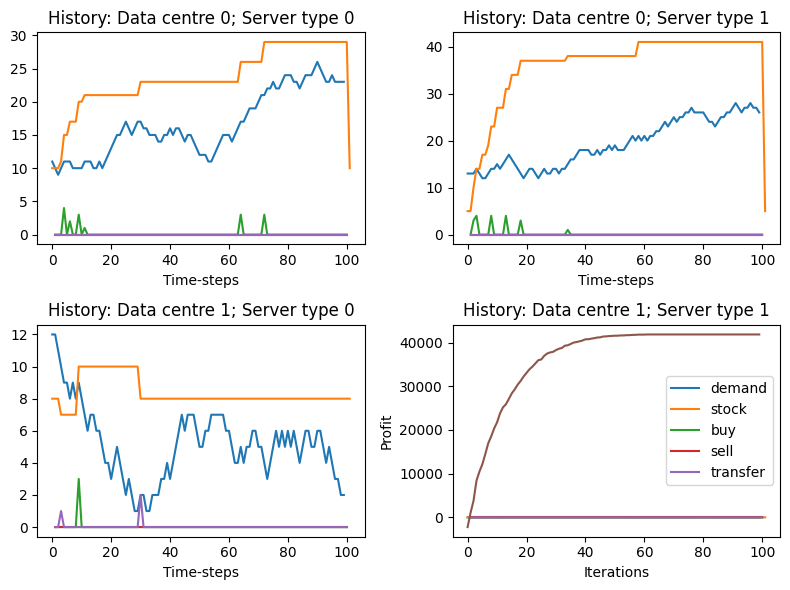

In [75]:
plot_history(demand, server_history, best_solution)

# Plot solution commands
plot_optimisation(ga_history)

Total profit: 41660


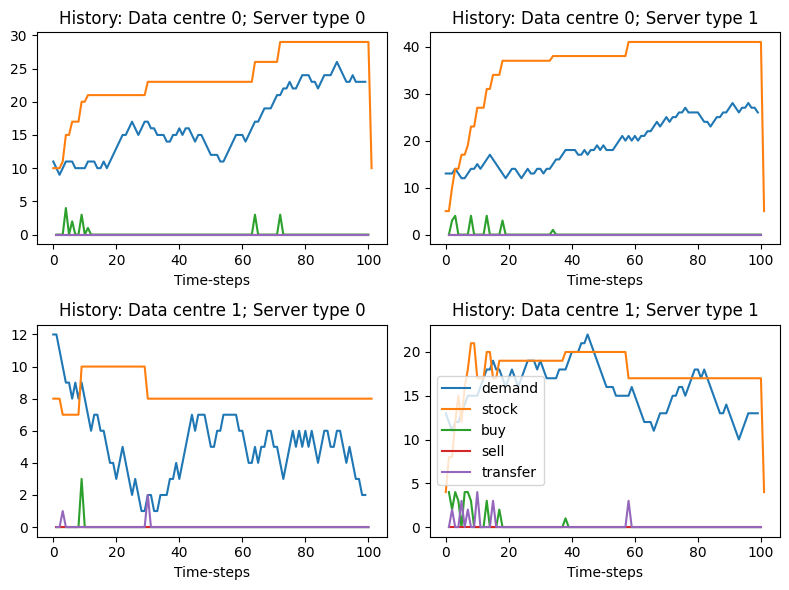

In [66]:
solution = best_solution
total_profit, server_history = f(solution, return_history=True)
print(f"Total profit: {total_profit}")
plot_history(demand, server_history, solution)

### Hyperparameter tuning for Genetic Algorithm (GA)

In this Genetic Algorithm hyperparameter tuning process, we focus on optimizing key parameters—pop_size, cross_rate, mut_rate, elite_fract, mut_val, and tournament_size—by defining two possible values for each. This limited selection helps manage computation and time constraints, enabling us to efficiently explore parameter combinations for maximizing profit. We created the function create_param_config where we  leverage a helper function using itertools.product to generate all combinations of these parameters, creating a comprehensive search space within the given constraints.

The main tuning function then iterates over each configuration, calculating the required number of generations based on pop_size and running the GA once per setup. For each configuration, we record the solution and profit achieved, updating the global best configuration and profit when a higher value is found. After all configurations have been tested, the function returns the best-performing parameter combination, the maximum profit achieved, and the average profit across all configurations. This approach provides an efficient method to identify the optimal settings for maximizing GA performance while staying within computational limits.

In [79]:
def hyperparameter_tuning():
    import numpy as np

    # Define hyperparameter search space
    param_grid = {
        "pop_size": [50, 100],
        "cross_rate": [0.6, 0.8],
        "mut_rate": [0.01, 0.05],
        "elite_fract": [0.05, 0.1],
        "mut_val": [1, 2],
        "tournament_size": [10, 15]
    }

    # Fixed parameters
    n = 100
    val = 6
    its = 10000
    # Initialize variables to store the global best results
    global_best_solution = None
    global_best_config = None
    global_best_profit = -np.inf
    total_profit = 0
    param_comb = create_param_grid(param_grid)

    results = []  # Store results for all configurations

    for config in param_comb:
        pop_size = config["pop_size"]
        cross_rate = config["cross_rate"]
        mut_rate = config["mut_rate"]
        elite_fract = config["elite_fract"]
        mut_val = config["mut_val"]
        tournament_size = config["tournament_size"]
        # Calculate number of generations
        ngens = int(its / pop_size)

        # Run configuration once
        solution, profit, _ = GA(
            f=f,
            init=pop_initializer,
            pop_size=pop_size,
            val=val,
            ngens=ngens,
            mutation=mutation,
            crossover=crossover,
            selection=tournament_selection,
            tournament_size=tournament_size,
            cross_rate=cross_rate,
            mut_rate=mut_rate,
            mut_val=mut_val,
             n=n,
            elite_fract=elite_fract,
        )
         # Track total profit and count for average calculation
        total_profit += profit

        # Update global best if necessary
        if profit > global_best_profit:
            global_best_profit = profit
            global_best_solution = solution
            global_best_config = config

        # Store configuration result
        results.append({
            "config": config,
            "profit": profit,
            "solution": solution,
        })

        print(f"Tested config: {config}, Profit: {profit}")

    # Calculate average profit across all configurations
    avg_profit = total_profit / len(param_comb)

    print(f"Global Best Config: {global_best_config}, Global Best Profit: {global_best_profit}")
    print(f"Average Profit across all configurations: {avg_profit}")

    return global_best_config, global_best_profit, global_best_solution, avg_profit, results

def create_param_grid(param_grid):
    """
    Generate all combinations of parameters from the parameter grid.
    """
    from itertools import product

    keys, values = zip(*param_grid.items())
    configurations = [dict(zip(keys, v)) for v in product(*values)]
    return configurations

# Call the tuning function
best_config, best_profit, best_solution, avg_profit, results = hyperparameter_tuning()






Tested config: {'pop_size': 50, 'cross_rate': 0.6, 'mut_rate': 0.01, 'elite_fract': 0.05, 'mut_val': 1, 'tournament_size': 10}, Profit: 41770
Tested config: {'pop_size': 50, 'cross_rate': 0.6, 'mut_rate': 0.01, 'elite_fract': 0.05, 'mut_val': 1, 'tournament_size': 15}, Profit: 41611
Tested config: {'pop_size': 50, 'cross_rate': 0.6, 'mut_rate': 0.01, 'elite_fract': 0.05, 'mut_val': 2, 'tournament_size': 10}, Profit: 37297
Tested config: {'pop_size': 50, 'cross_rate': 0.6, 'mut_rate': 0.01, 'elite_fract': 0.05, 'mut_val': 2, 'tournament_size': 15}, Profit: 37137
Tested config: {'pop_size': 50, 'cross_rate': 0.6, 'mut_rate': 0.01, 'elite_fract': 0.1, 'mut_val': 1, 'tournament_size': 10}, Profit: 42009
Tested config: {'pop_size': 50, 'cross_rate': 0.6, 'mut_rate': 0.01, 'elite_fract': 0.1, 'mut_val': 1, 'tournament_size': 15}, Profit: 41868
Tested config: {'pop_size': 50, 'cross_rate': 0.6, 'mut_rate': 0.01, 'elite_fract': 0.1, 'mut_val': 2, 'tournament_size': 10}, Profit: 37510
Tested co

Global Best Config: {'pop_size': 100, 'cross_rate': 0.8, 'mut_rate': 0.05, 'elite_fract': 0.05, 'mut_val': 1, 'tournament_size': 10} this is the best configuration we got for Genetic Algorithm after performing Hyperparameter Tuning

In [80]:
np.save("bestGA.npy", best_profit)

## Graph for 4 algorithm and algorithm comparision

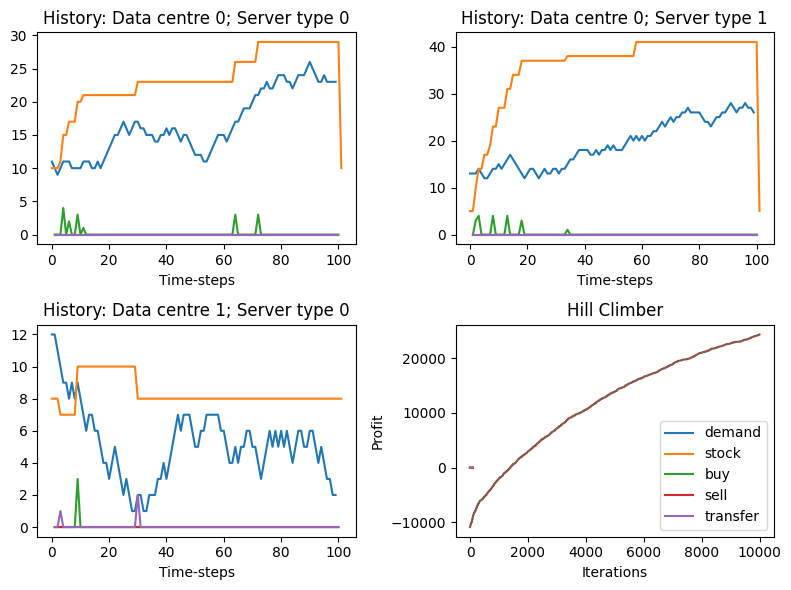

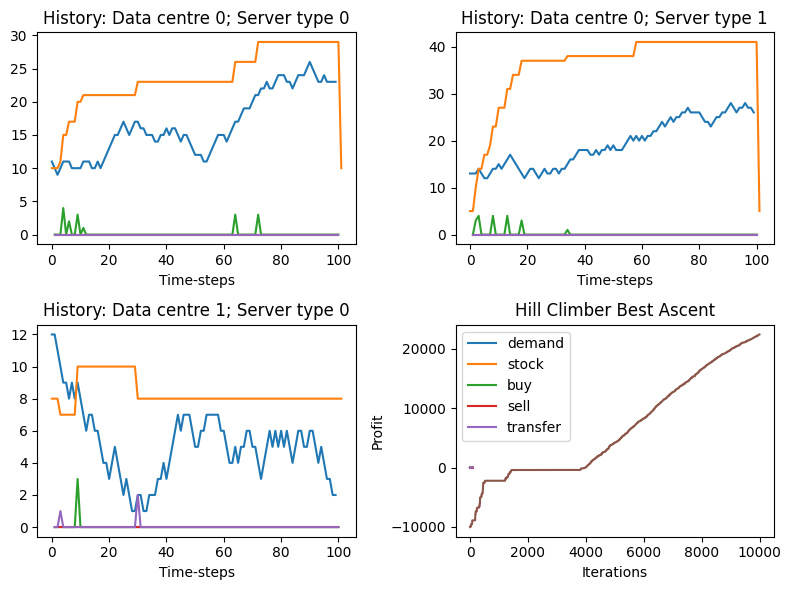

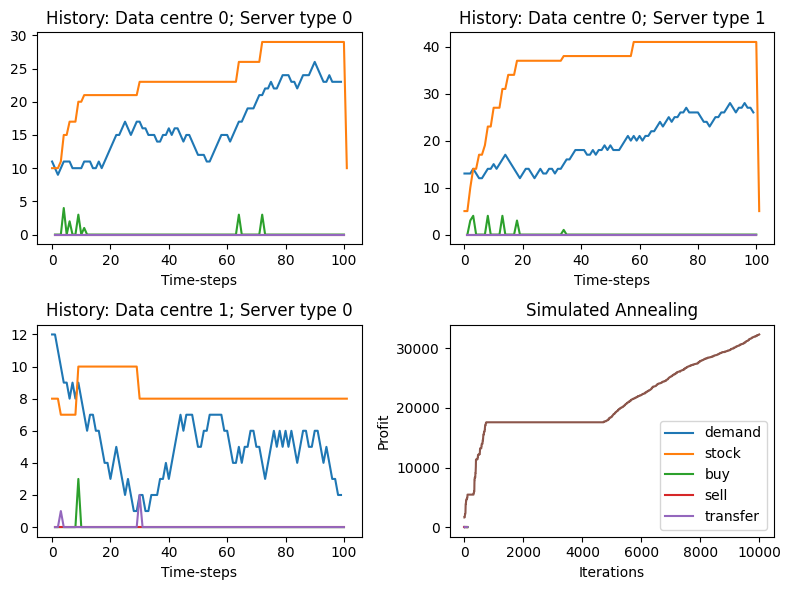

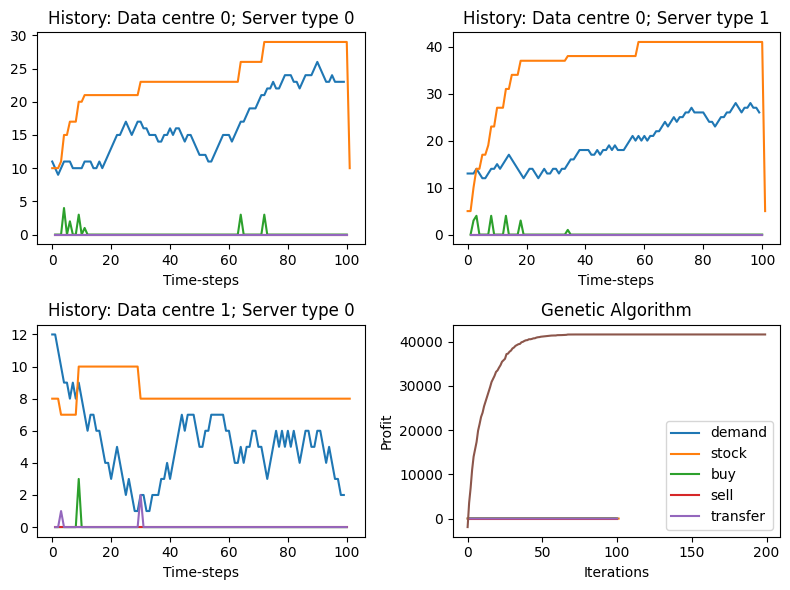

In [72]:
#Graph for Normal Hill climbing
plot_history(demand, server_history, solution)
plot_optimisation(hist)
plt.title("Hill Climber")
plt.show()


# Graph for Best Ascent Hill Climbing
plot_history(demand, server_history, best_solution)
plot_optimisation(history)
plt.title("Hill Climber Best Ascent")
plt.show()

#Graph for Simulated Annealing
plot_history(demand, server_history, solution)
plot_optimisation(history_SA)
plt.title("Simulated Annealing")
plt.show()

#Graph for Genetic Algorithm
plot_history(demand, server_history, best_solution)
plot_optimisation(ga_history)
plt.title("Genetic Algorithm")
plt.show()

# Summary

# Hill Climber
As you can see for Hill Climbing the Algorithm is performing relatively good but the maximum profit it is able to achieve is 24,341 which is not the best profit when compared to the other algorithms. Also we can notice that we cant see the graph getting stuck in local optima as the number of iterations are low and if we increase the iterations we could see that trend.

# Hill Climber (Best Ascent)
When we look at Best Ascent Hill Climbing it is giving us a profit of 33,495 which is much higher than Normal Hill Climber. The reason for its better performance is, as we have described above, because of getting multiple neighbours and selecting the best neigbhour based on the objective function profit. This also helps us escaping the local optima

# Simmulated Annealing
When we look at simulate Annealing we are getting a profit of 32,347. We also see a similar trend of escaping the local optimum in Simulated annealing as well as told above, because of acceptance of worse solutions during the early stages of the optimization process. This mechanism, governed by a "temperature" parameter, allows the algorithm to occasionally accept less favorable moves, helping it explore a broader solution space and avoid getting trapped in local optima.

# Genetic Algorithm
When we look at Genetic Algorithm we are getting a profit of 41,660. As you can see Genetic Algorithm is performing the best out of these 4 Algorithms. The reason it outperforms all of them because we selecting best of the best candidadates (working on survival of the fitest approach) and hence it tries to converge towards the best solution.